In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from scikitplot.metrics import plot_confusion_matrix 

In [20]:
normal_learning_results = np.array(pickle.load(open("results/normal_learning_results.data", "rb")))
normal_learning_predictions = pickle.load(open("results/normal_learning_predictions.data", "rb"))
transfer_learning_results = np.array(pickle.load(open("results/transfer_learning_results.data", "rb")))
transfer_learning_predictions = pickle.load(open("results/transfer_learning_predictions.data", "rb"))

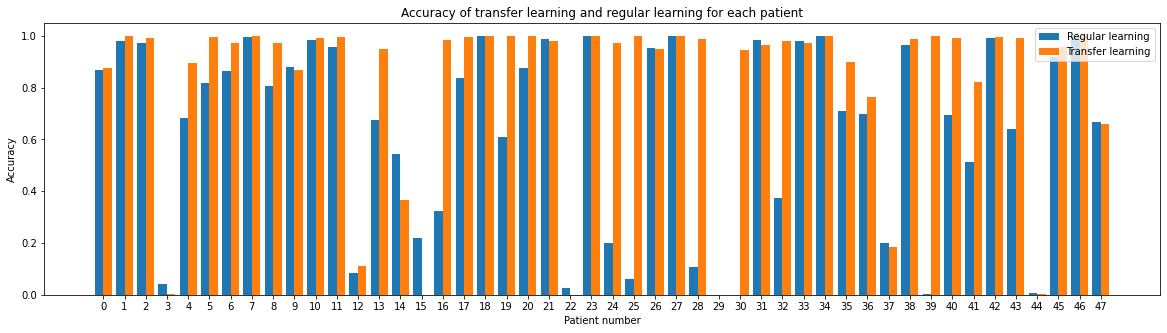

In [3]:
normal_accuracy = normal_learning_results[:,1]
transfer_accuracy = transfer_learning_results[:,1]

plt.figure(figsize=(20, 5))
ind = np.arange(normal_accuracy.shape[0])
bar_width = 0.4
plt.bar(ind, normal_accuracy, bar_width, label="Regular learning")
plt.bar(ind+bar_width, transfer_accuracy, bar_width, label="Transfer learning")
plt.xticks(ind+bar_width/2, ind)
plt.xlabel("Patient number")
plt.ylabel("Accuracy")
plt.title("Accuracy of transfer learning and regular learning for each patient")
plt.legend()
plt.savefig("figures/accuracy_barplot.png")
plt.show()

In [4]:
normal_accuracy = np.average(normal_learning_results[:,1])
transfer_accuracy = np.average(transfer_learning_results[:,1])
print("Avg. normal learning accuracy", normal_accuracy)
print("Avg. transfer learning accuracy", transfer_accuracy)

Avg. normal learning accuracy 0.6398869768502967
Avg. transfer learning accuracy 0.8122204558749218


In [5]:
normal_learning_predictions[0][0]

array([[ 1.5741906 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.851293  ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71997046,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [11.145826  ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 9.089872  ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [6]:
data = pd.read_pickle("splitted_samples.data")
labels = data["beat_type"].factorize()[1]

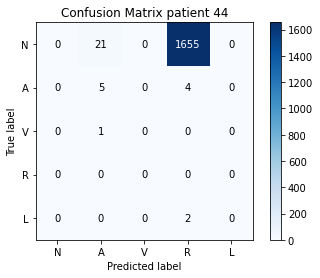

In [59]:
patient = 44

a = np.argmax(transfer_learning_predictions[patient][0], axis=1)
b = np.squeeze(transfer_learning_predictions[patient][1])

#     plt.title(f"Regular p {i}")
plot_confusion_matrix(a, b)
newlabels = labels[plt.xticks()[0]]
plt.title("Confusion Matrix patient " + str(patient))
plt.xticks(np.arange(newlabels.shape[0]), newlabels)
plt.yticks(np.arange(newlabels.shape[0]), newlabels)
plt.savefig(f"figures/cm_p{patient}")

plt.show()

In [60]:
normal_learning_predictions

[(array([[ 1.5741906 ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 7.851293  ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.71997046,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [11.145826  ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 9.089872  ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]], dtype=float32),
  array([[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]])),
 (array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
           0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
           0.       ],
         [ 0.       ,  0.       ,  0.       , ..

In [21]:
transfer_learning_predictions

[(array([[9.547903 , 0.       , 0.       , ..., 0.       , 0.       ,
          0.       ],
         [6.8969364, 0.       , 0.       , ..., 0.       , 0.       ,
          0.       ],
         [7.8802166, 0.       , 0.       , ..., 0.       , 0.       ,
          0.       ],
         ...,
         [9.737144 , 0.       , 0.       , ..., 0.       , 0.       ,
          0.       ],
         [8.584636 , 0.       , 0.       , ..., 0.       , 0.       ,
          0.       ],
         [4.243868 , 0.       , 0.       , ..., 0.       , 0.       ,
          0.       ]], dtype=float32),
  array([[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]])),
 (array([[43.19046 ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [45.159927,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [51.332188,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         ...,
         [34.806988,  0.  

In [17]:
transfer_learning_results

array([[4.99221325e-01, 8.74251485e-01],
       [2.99221016e-02, 9.98044968e-01],
       [4.44725826e-02, 9.93207574e-01],
       [3.45666504e+00, 2.41935486e-03],
       [5.51353872e-01, 8.94323945e-01],
       [4.91950102e-02, 9.95617211e-01],
       [2.10662976e-01, 9.73471761e-01],
       [4.95690154e-03, 9.98327732e-01],
       [1.93914562e-01, 9.71207857e-01],
       [4.21080977e-01, 8.69410574e-01],
       [5.05881906e-02, 9.92659509e-01],
       [1.88023672e-02, 9.96877789e-01],
       [2.35018587e+00, 1.11553788e-01],
       [1.77765101e-01, 9.50617313e-01],
       [1.67657888e+00, 3.67358088e-01],
       [2.63905859e+00, 0.00000000e+00],
       [1.19473383e-01, 9.83240247e-01],
       [1.37431882e-02, 9.96291697e-01],
       [2.43939199e-02, 9.98389721e-01],
       [1.48413498e-02, 9.98389721e-01],
       [1.92413907e-02, 9.98818636e-01],
       [1.46336004e-01, 9.82166469e-01],
       [2.63905811e+00, 0.00000000e+00],
       [5.78587223e-03, 9.99335110e-01],
       [1.122199